# Charts

Charts are powerful to understand the data. Most of them are using aggregations to represent the dataset. Some others downsample the data to represent a part of the entire dataset. Let's first look at pies and histograms. 

Drawing the Pie or Histogram of a categorical column in Vertica ML Python is quite easy.

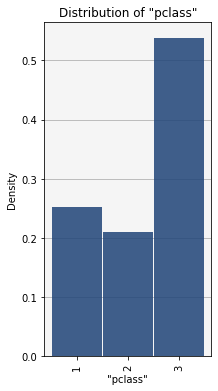

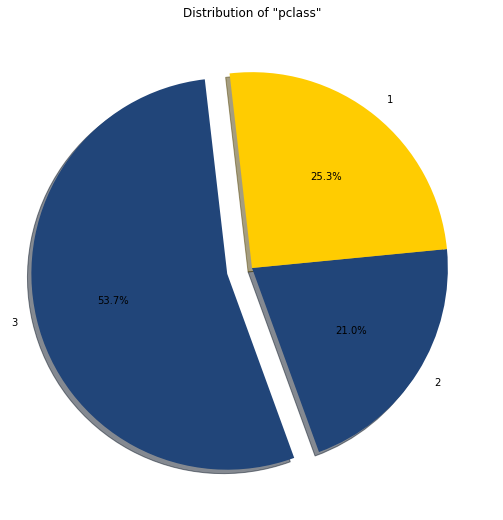

In [34]:
from vertica_ml_python import *
vdf = vDataFrame("public.titanic")
vdf["pclass"].hist()
vdf["pclass"].pie()

These methods will draw the most occurent categories and merge the others. To change the number of elements to display, you should use the 'max_cardinality' parameter.

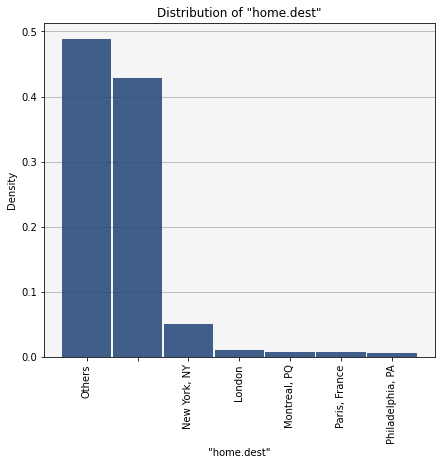

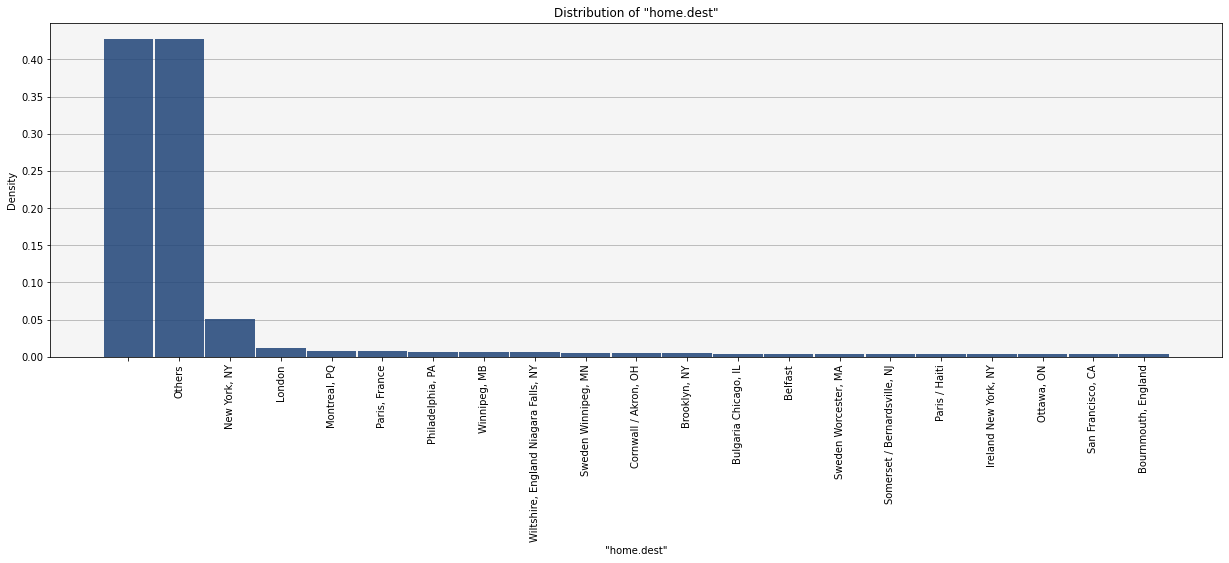

In [6]:
vdf["home.dest"].hist()
vdf["home.dest"].hist(max_cardinality = 20)

When dealing with numerical data types, the process is different. Vertica needs to discretize the numerical features to draw them. You can choose the bar width ('h' parameter) or let Vertica ML Python compute an optimal one using the Freedman Diaconis method.

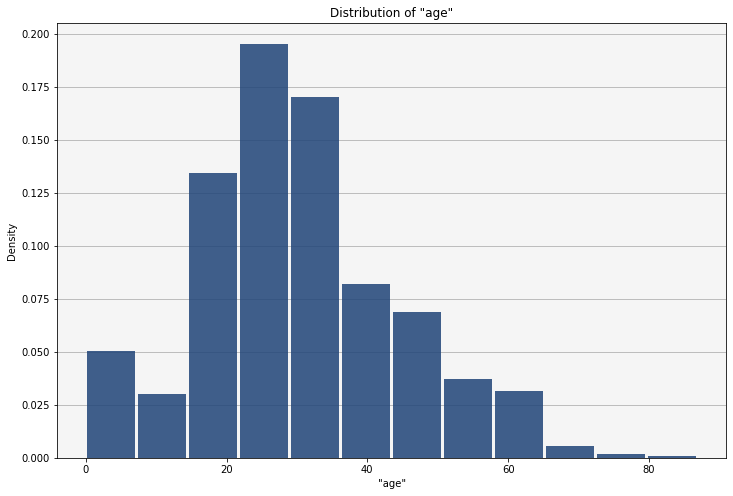

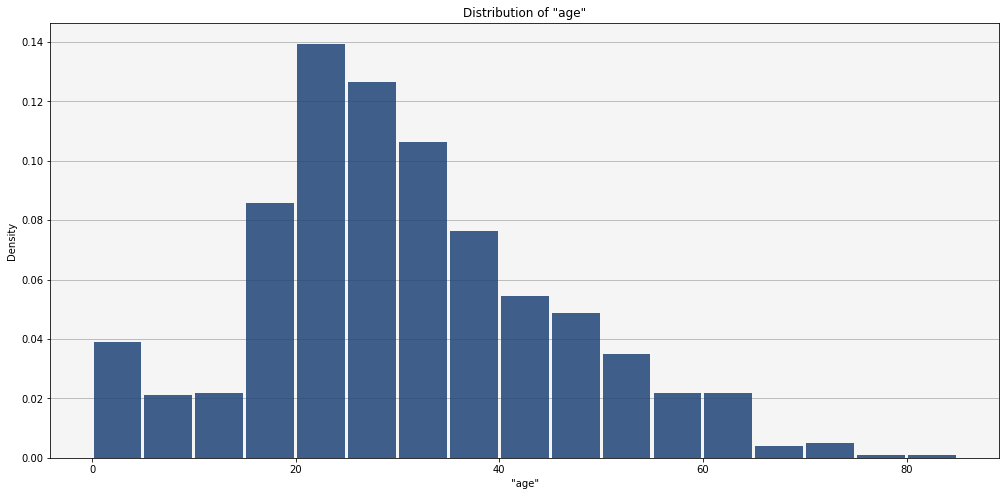

In [7]:
vdf["age"].hist()
vdf["age"].hist(h = 5)

It is possible to change the occurences by another aggregation. The parameters 'method' and 'of' must be changed according to our needs.

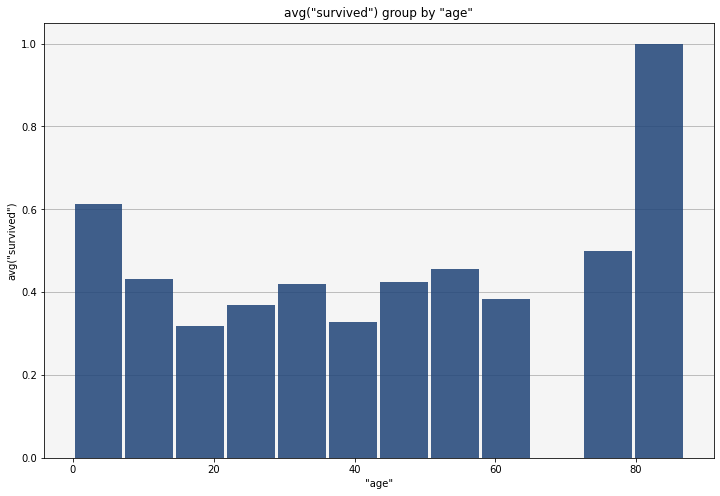

In [11]:
vdf["age"].hist(method = "avg", of = "survived")

Vertica ML Python is using the same process for other graphics such as 2D Histograms or Bars.

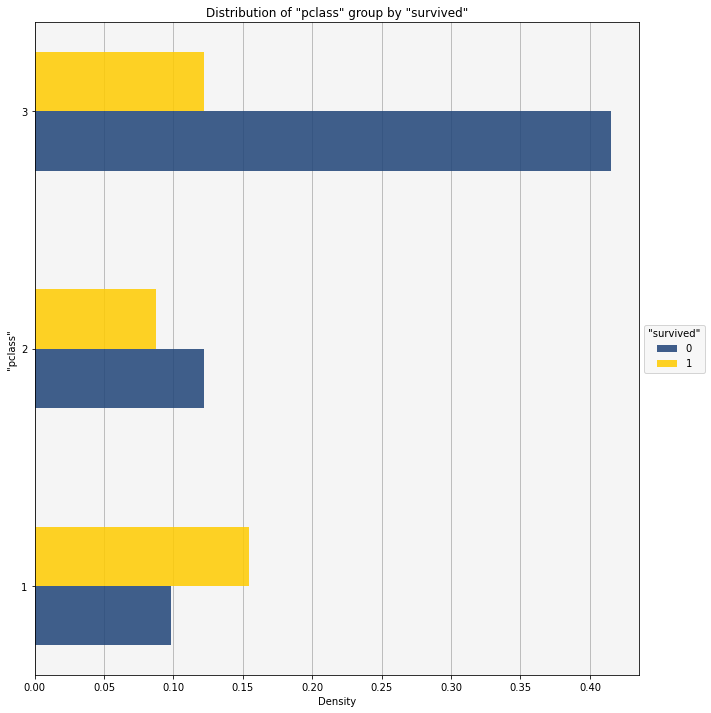

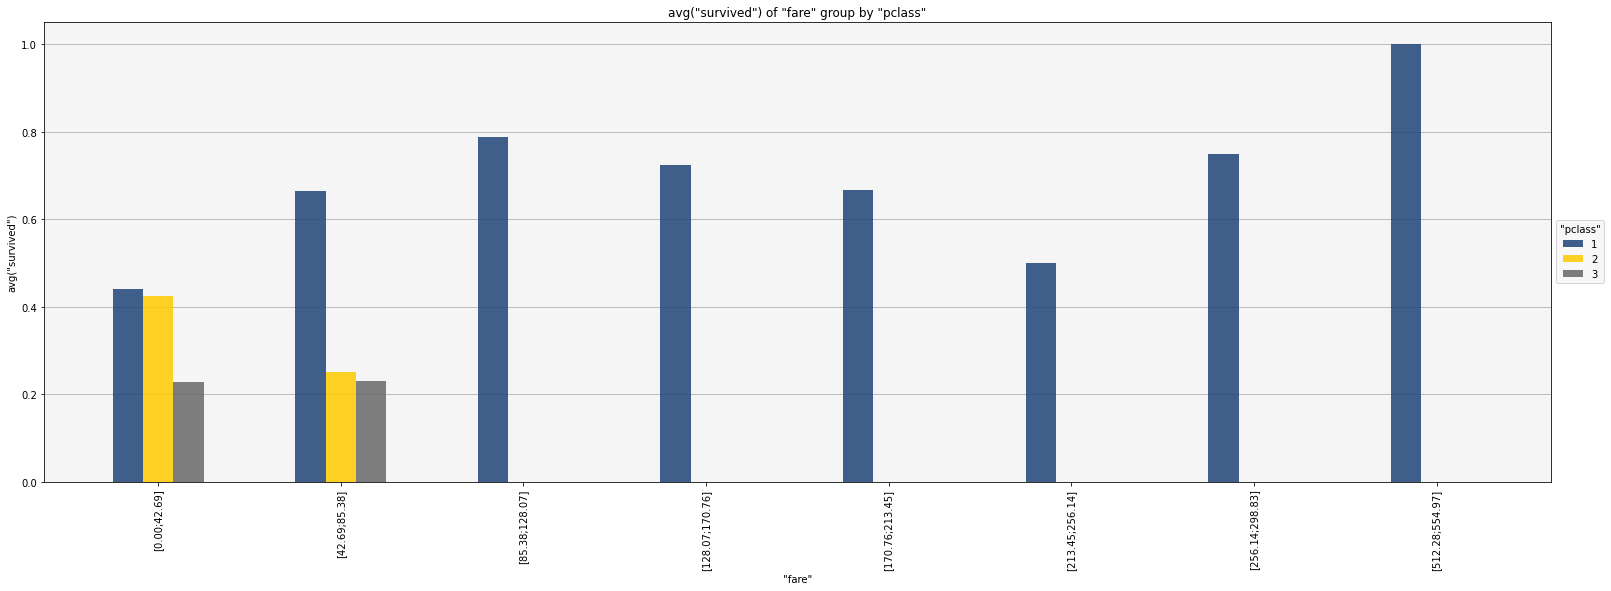

In [12]:
vdf.bar(["pclass", "survived"])
vdf.hist(["fare", "pclass"],
         method = "avg",
         of = "survived")

Pivot Tables are more powerful than histograms or bar charts. They give us aggregated information on all the possible categories.

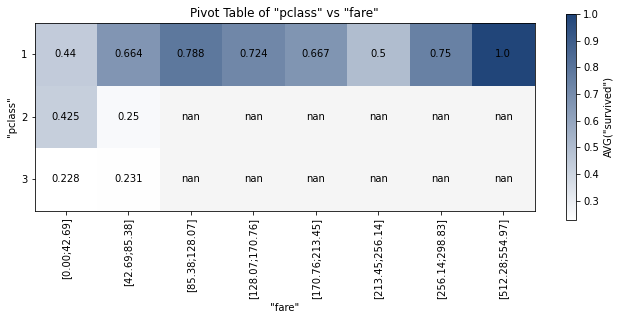

In [13]:
x = vdf.pivot_table(["pclass", "fare"], 
                    method = "avg",
                    of = "survived")

Box plots are useful to understand variables dispersion.

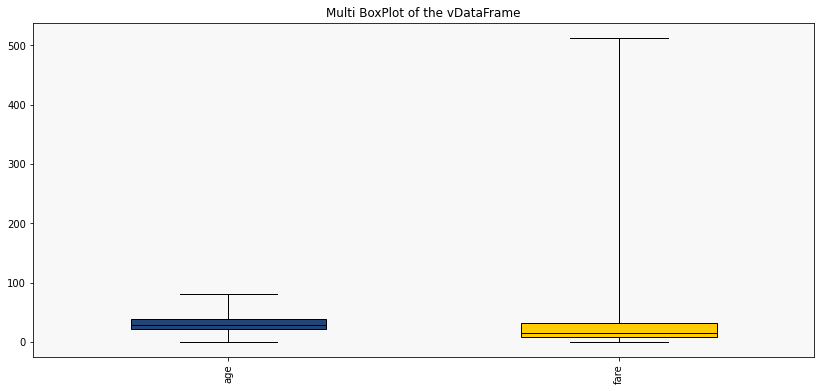

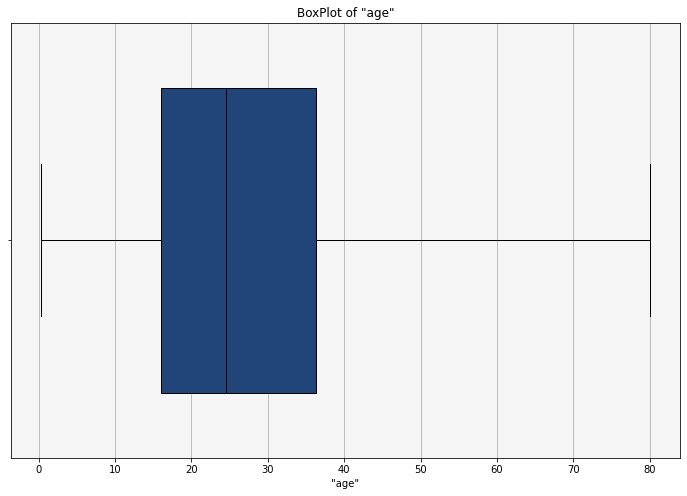

In [37]:
vdf.boxplot(columns = ["age", "fare"])
vdf["age"].boxplot()

It is also possible to understand many patterns using scatter and bubble plots. However, these methods are not using aggregations. That's why Vertica ML Python will downsample the data before plotting. A parameter 'max_nb_points' can be used to avoid heavy memory usage during the drawing.

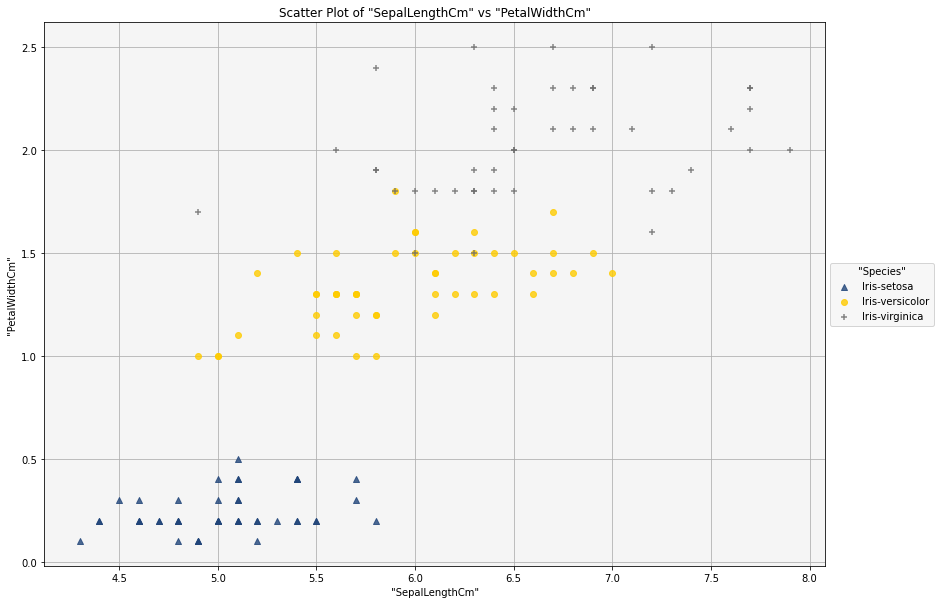

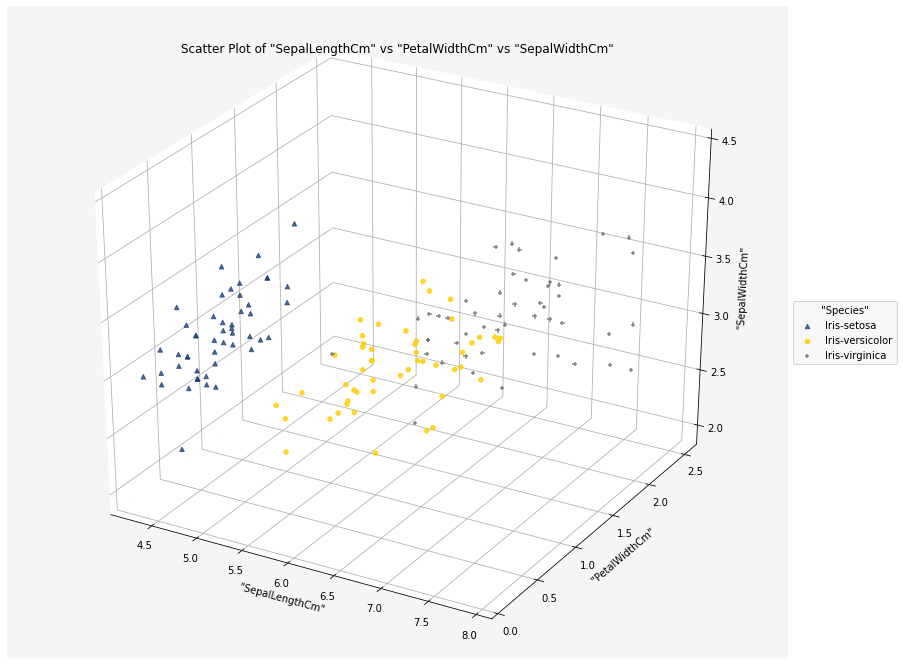

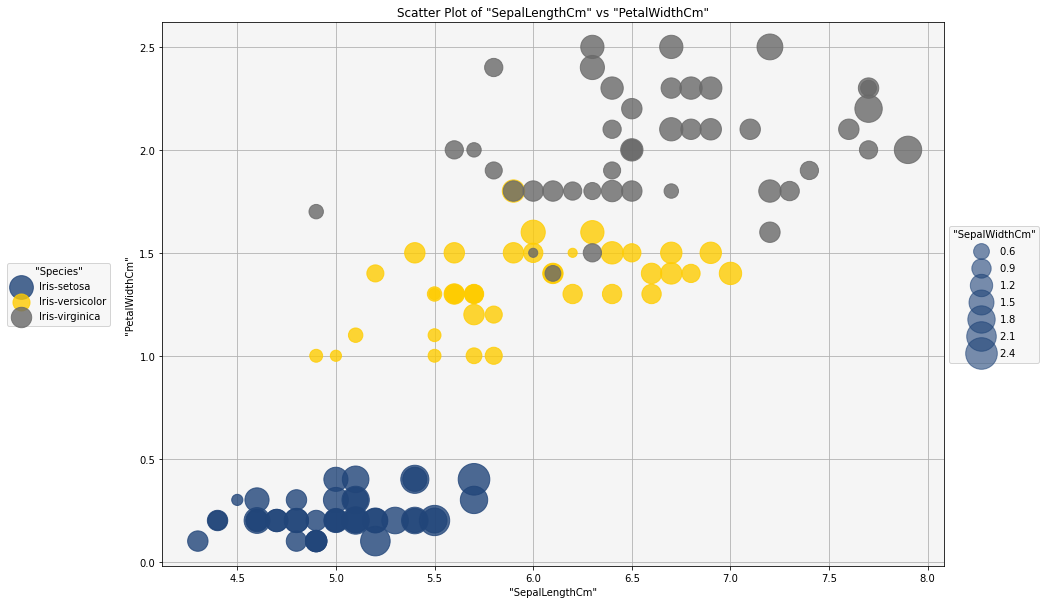

In [18]:
vdf = vDataFrame("public.iris")
vdf.scatter(["SepalLengthCm", "PetalWidthCm"], 
            catcol = "Species", 
            max_nb_points = 1000)
vdf.scatter(["SepalLengthCm", "PetalWidthCm", "SepalWidthCm"], 
            catcol = "Species", 
            max_nb_points = 1000)
vdf.bubble(["SepalLengthCm", "PetalWidthCm"], 
            size_bubble_col = "SepalWidthCm",
            catcol = "Species", 
            max_nb_points = 1000)

Hexbin Plots can be used to get heatmaps. 

They will compute aggregations to get the final results and they are a way to summarize scatter plots.

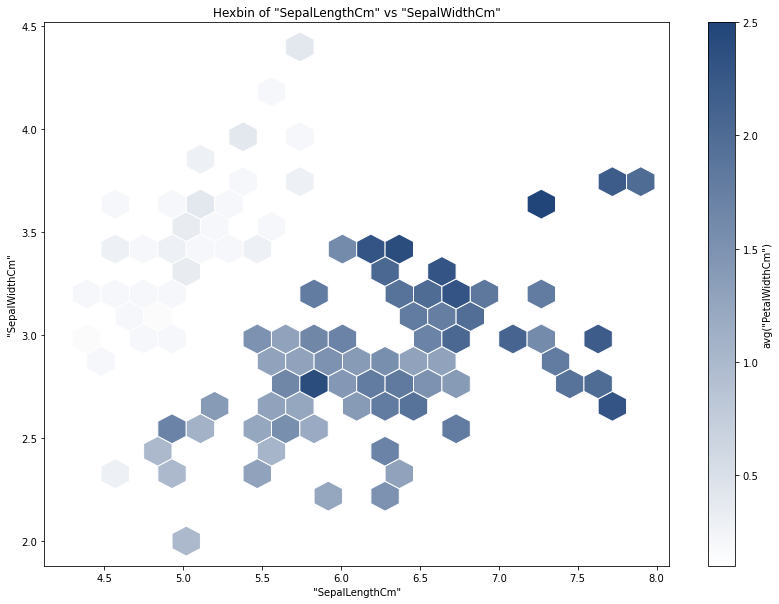

In [20]:
vdf.hexbin(["SepalLengthCm", "SepalWidthCm"], 
            method = "avg", 
            of = "PetalWidthCm")

Hexbin, scatter plots and bubble plots allow you to enter an input image which will be used as background.

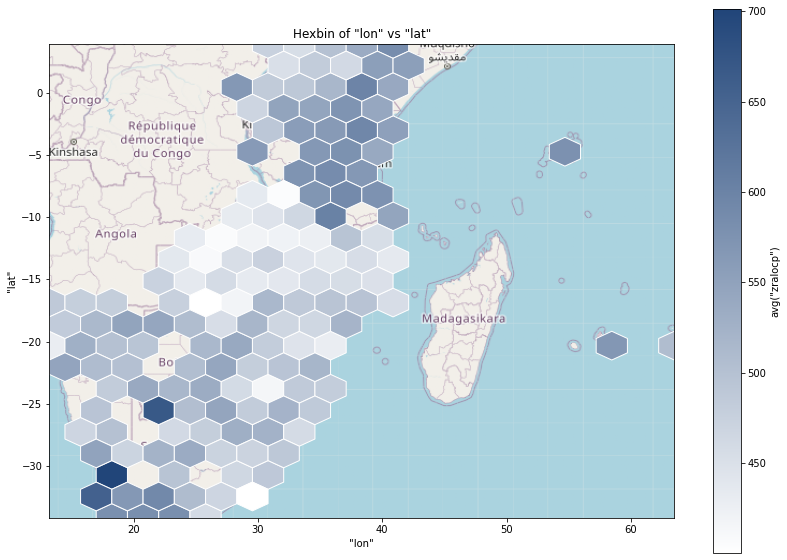

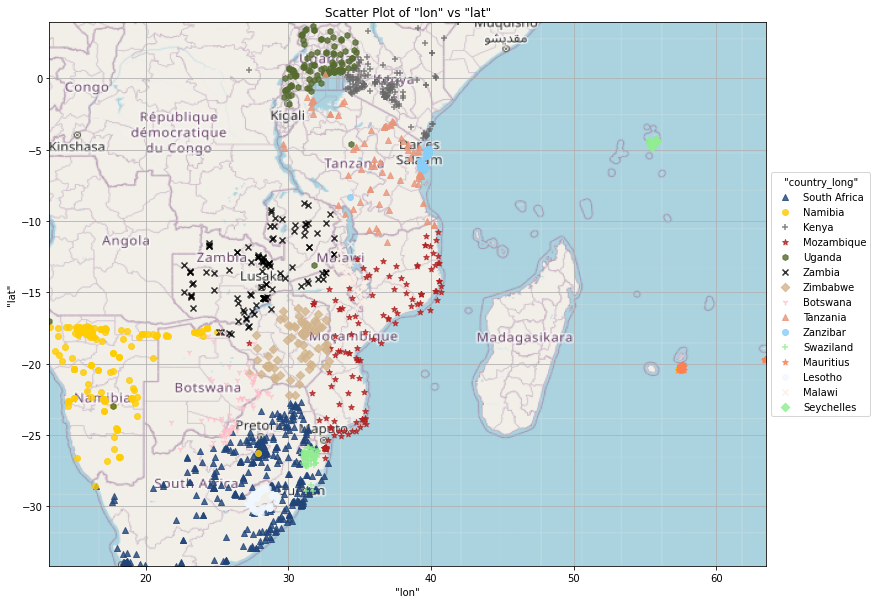

In [24]:
africa = vDataFrame("africa_education")
# displaying avg students score in Africa
africa.hexbin(["lon", "lat"],
              method = "avg",
              of = "zralocp",
              img = "img/africa.png")
# displaying schools in Africa
africa = africa.groupby(["country_long", "lat", "lon"])
africa.scatter(["lon", "lat"],
              catcol = "country_long",
              max_cardinality = 100,
              img = "img/africa.png")

It is also possible to draw Time Series using the 'plot' method.

5259 element(s) was/were filtered


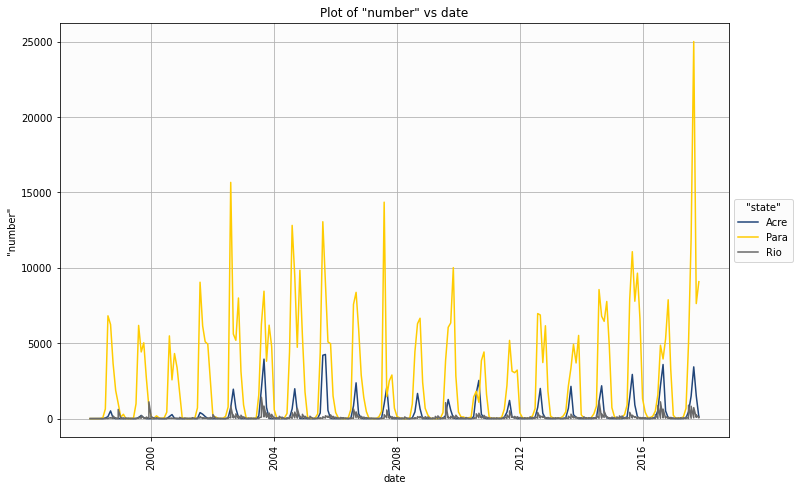

In [31]:
vdf = vDataFrame("amazon")
vdf.filter("state IN ('Acre', 'Rio', 'Para')")
vdf["number"].plot(ts = "date", by = "state")

As time series plots do not aggregate the data, it is important to choose the correct 'start_date' and 'end_date'.

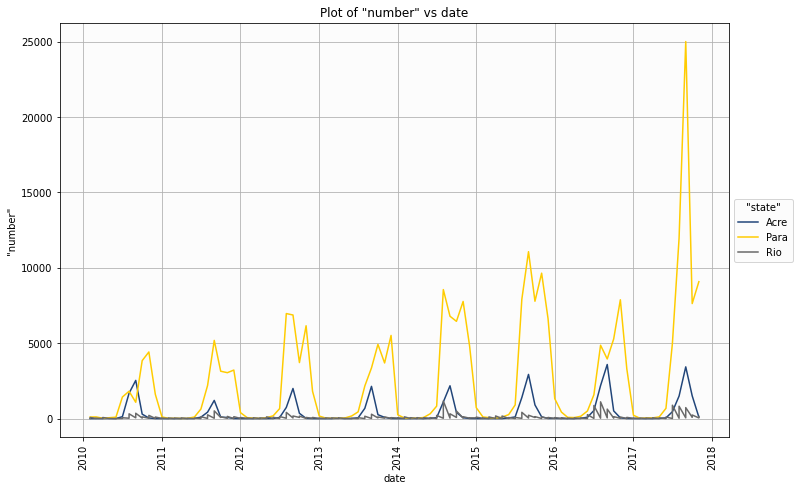

In [32]:
vdf["number"].plot(ts = "date", by = "state", start_date = "2010-01-01")

Graphics help us to understand our data to take suitable decisions. 

Another important topic is to look at the link between the different variables. That's the main subject of our next lesson !